<a href="https://colab.research.google.com/github/RovilSurioJr/Numerical-Methods/blob/master/Linear Regression/Midterms_Exam_Numeth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Solving System of Linear Equation


### QUESTION 1:

In the problem posed at the beginning of the section, John invested his inheritance of 12,000 dollars in three different funds: part in a money-market fund paying 3% interest annually; part in municipal bonds paying 4% annually; and the rest in mutual funds paying 7% annually. John invested 4,000 dollars more in mutual funds than he invested in municipal bonds. The total interest earned in one year was 670 dollars. How much did he invest in each type of fund?

$$\left[\begin{array}{ccc|c}
1&1&1&12000\\
0&-1&1&4000\\
0.03&0.04&0.07&670\\
\end{array}\right] \\ _{\text{(Standard bracketed form)}}$$

$$\begin{bmatrix}
1&1&1\\
0&-1&1\\
0.03&0.04&0.07\\
\end{bmatrix} \cdot
\begin{bmatrix}x\\y\\z\\\end{bmatrix}=
\begin{bmatrix}12000\\4000\\670\\\end{bmatrix}
\\ _{\text{(Linear Combination form)}}$$

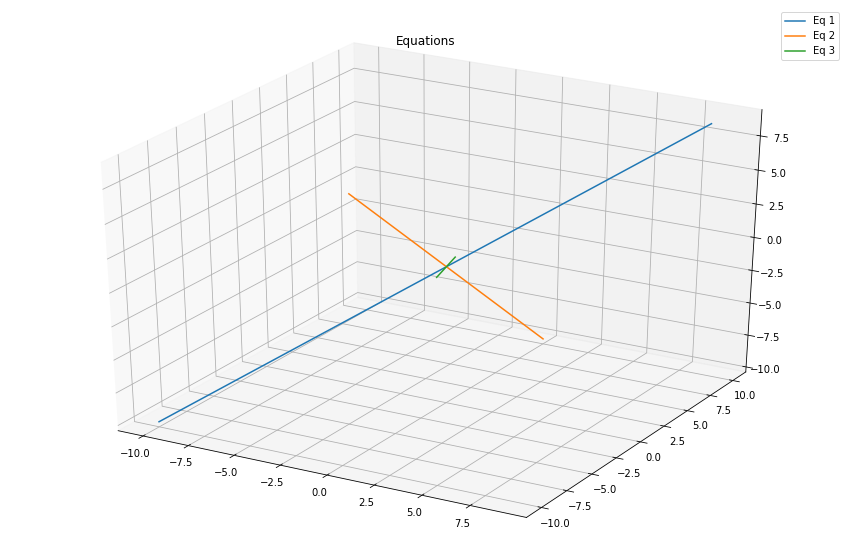

In [30]:
import numpy  as np
import matplotlib.pyplot as plt
X = np.array([[1, 1, 1],[0, -1, 1],[0.03, 0.04,0.07]],float)
b = np.array([12000, 4000, 670],float)

c = np.arange(-10,10,1)
equation1 = X[0]
equation2 = X[1]
equation3 = X[2]


fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')

plt.title('Equations')

ax.plot(c*equation1[0],c*equation1[1],c*equation1[2], label = "Eq 1")
ax.plot(c*equation2[0],c*equation2[1],c*equation2[2], label = "Eq 2")
ax.plot(c*equation3[0],c*equation3[1],c*equation3[2], label = "Eq 3")

plt.grid()
plt.legend()
plt.show()

In [31]:
import numpy as np

In [32]:
def gaussElim(X,b):
  n = len(b)
  v = np.empty(n)
  for k in range(0,n-1):
    if X[k, k] == 0:
        for j in range (n):
            X[k,j], X[k+1, j] = X[k+1, j], X[k,j]
        b[k], b[k+1] = b[k+1], b[k]
    for i in range(k+1, n):
        if X[i, k] != 0:
          fctr = X[k, k] / X[i, k]
          b[i] = b[k] - fctr*b[i]
          X[i,k+1:n] = X[k,k+1:n] - fctr*X[i,k+1:n]

  v[n-1] = b[n-1] / X[n-1, n-1]
  for i in range(n-2,-1,-1):
    v[i]= (b[i]- np.sum(X[i,i+1:n]*v[i+1:n]))/X[i,i]
  
  return v

In [33]:
X = np.array([[1, 1, 1],[0, -1, 1],[0.03, 0.04,0.07]],float)
b = np.array([12000, 4000, 670],float)
invest = gaussElim(X,b)

print('Invested in money-market fund with an amount of: ${:.2f}'.format(float(invest[0])))
print('Invested in municipal bonds with an amount of: ${:.2f}'.format(float(invest[1])))
print('Invested in mutual funds with an amount of: ${:.2f}'.format(float(invest[2])))


Invested in money-market fund with an amount of: $2000.00
Invested in municipal bonds with an amount of: $3000.00
Invested in mutual funds with an amount of: $7000.00


### References

[1] Lumen Learning College Algebra (2021). [***Systems of Linear Equations: Three Variables***](https://courses.lumenlearning.com/collegealgebra2017/chapter/introduction-systems-of-linear-equations-three-variables/)


## Curve Fitting

### Multiple Linear Regression

In [34]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [35]:
db_dataset = datasets.load_diabetes()
db = pd.DataFrame(db_dataset.data, columns=db_dataset.feature_names)
#db.describe()
#print(db_dataset.DESCR)

In [36]:
# sns.pairplot(db)
# plt.show

In [37]:
Y = db_dataset.target # Y is the target data provided or the quantitative measure of disease progression one year after baseline

### Problem

Determine the percentage of how bmi, s5 (possibly log of serum triglycerides level), and s6 (sugar level) of the patient could explain the values of the disease progression one year after baseline.



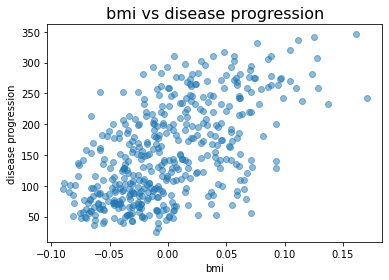

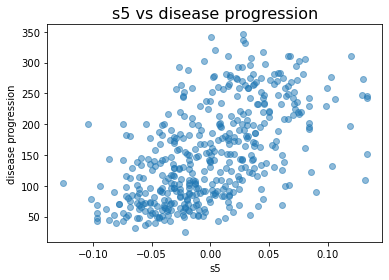

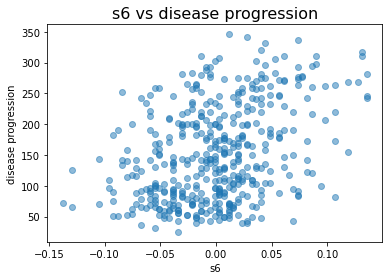

In [38]:
plt.scatter(x=db['bmi'],y=Y,alpha=0.5)
plt.title('bmi vs disease progression', fontsize=16) 
plt.xlabel('bmi')  
plt.ylabel('disease progression') 
plt.show()

plt.scatter(x=db['s5'],y=Y,alpha=0.5)
plt.title('s5 vs disease progression', fontsize=16) 
plt.xlabel('s5')  
plt.ylabel('disease progression') 
plt.show()

plt.scatter(x=db['s6'],y=Y,alpha=0.5)
plt.title('s6 vs disease progression', fontsize=16) 
plt.xlabel('s6')  
plt.ylabel('disease progression') 
plt.show()

In [39]:
X = pd.DataFrame(np.c_[db['bmi'], db['s6'],db['s5']], columns=['bmi','s6','s5'])
y = db_dataset.target

In [40]:
# We are using 80% of the data to build the training set and 20% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1) 

In [41]:
model = LinearRegression() #Defining linear regression model
model.fit(X_train, y_train) #Building training model

LinearRegression()

In [42]:
model_summary = pd.DataFrame(X.columns, columns=['Features'])
model_summary['Weights Raw'] = model.coef_.reshape(3,1) # Coefficient of each Feaatures
model_summary = model_summary.append({'Features':'Intercept', 'Weights Raw':float(model.intercept_)}, ignore_index=True)
model_summary

,Features,Weights Raw
0,bmi,678.324727
1,s6,85.890837
2,s5,571.126807
3,Intercept,151.646552


In [14]:
preds = model.predict(X_test) # applying trained model to make prediction using test set
out = pd.DataFrame({'Actual': y_test, 'Predicted': preds})

Text(0, 0.5, 'Prediction')

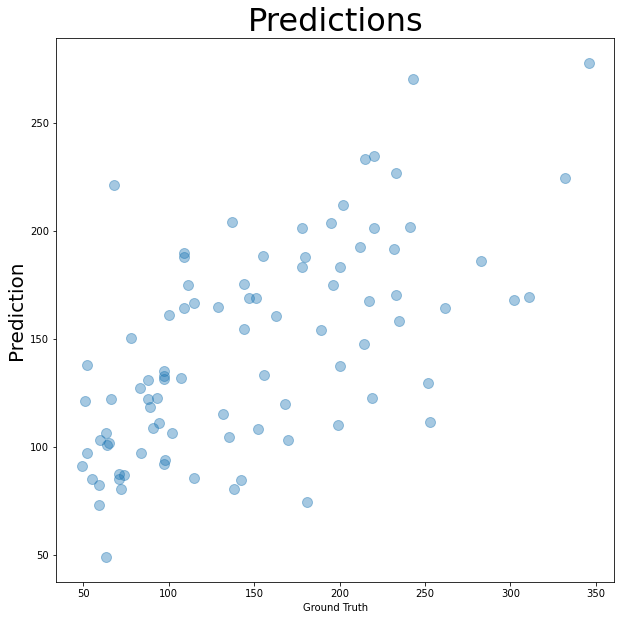

In [15]:
plt.figure(figsize=(10,10))
plt.title('Predictions', fontsize=32)
plt.scatter(y_test, preds, s = 100,  alpha=0.4)
plt.xlabel('Ground Truth')
plt.ylabel('Prediction', fontsize=20)

In [16]:
def adjr2(r2,x):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [17]:
MSE = metrics.mean_squared_error(y_test, preds)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, preds)
AR2 = adjr2(R2,X_train)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],
                              ['Adjusted R^2']], 
                             columns=['Metrics'])
model_metrics['Multiple Regression'] = MSE, RMSE, R2, AR2
model_metrics

,Metrics,Multiple Regression
0,MSE,3230.174342
1,RMSE,56.834623
2,R^2,0.393846
3,Adjusted R^2,0.388636


The correlation of disease progression with the BMI, s5 (possible log of serum triglycerides level), and s6 (sugar level) was shown above. It can be concluded that the quantitative measure of disease progression one year after baseline was affected only to a certain degree of the BMI, s5, and s6 of the patient which is proven by relatively small R^2 which is 0.39. Therefore, the BMI, s5, and s6 could explain the measure of disease progression values by only 39%

### Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
def adjr2(r2,x):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [43]:
X = pd.DataFrame(np.c_[db['bmi'], db['s6'],db['s5']], columns=['bmi','s6','s5'])
y = db_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [21]:
quad_features = PolynomialFeatures(degree=2)
x_quad = quad_features.fit_transform(X_train)

In [22]:
model = LinearRegression()
model.fit(x_quad,y_train)

LinearRegression()

In [23]:
preds = model.predict(quad_features.fit_transform(X_test))

In [24]:
poly_MSE = metrics.mean_squared_error(y_test,preds)
poly_RMSE = np.sqrt(poly_MSE)
poly_R2 = metrics.r2_score(y_test,preds)
poly_AR2 = adjr2(poly_R2,X_train)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],
                              ['Adjusted R^2']], 
                             columns=['Metrics'])
model_metrics['Polynomial Regression'] = poly_MSE, poly_RMSE, poly_R2, poly_AR2
model_metrics

,Metrics,Polynomial Regression
0,MSE,3194.420746
1,RMSE,56.519207
2,R^2,0.400556
3,Adjusted R^2,0.395403


Using the polynomial regression improves the R^2 by 1% and lessen the MSE and this is because we can have now a curve hence more data point can be reached. Therefore, the BMI, s5, and s6 could explain the measure of disease progression values by 40% now.

### Linear Regression using Normal Equation

$$\theta = (X^TX)^{-1}X^Ty \\ _{\text{(Normal Equation)}}$$

In [44]:
X = pd.DataFrame(np.c_[db['bmi'], db['s6'],db['s5']], columns=['bmi','s6','s5'])
y = db_dataset.target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1) 

In [27]:
X=X_train
y=y_train     

ones = np.ones((X.shape[0], 1)) # Appending a column of ones in X to add the bias term.
X = np.concatenate((ones, X), axis=1)
XTX = np.dot(X.T,X)
XTX_inv = np.linalg.inv(XTX)
XTy = ((X.T).dot(y))
inter_weights = np.dot(XTX_inv,XTy)
intercept = inter_weights[0]
print("The intercept is:",intercept)
weights = inter_weights[1:8]
print("The weights are:",weights)

The intercept is: 151.6465519307307
The weights are: [678.32472659  85.89083682 571.12680662]


In [28]:
ones = np.ones((X_test.shape[0], 1)) # Appending a column of ones in X to add the bias term.
X = np.concatenate((ones, X_test), axis=1)
preds = np.dot(X,inter_weights)

In [29]:
normal_MSE = metrics.mean_squared_error(y_test, preds)
normal_RMSE = np.sqrt(normal_MSE)
normal_R2 = metrics.r2_score(y_test, preds)
normal_AR2 = adjr2(normal_R2,X_train)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],
                              ['Adjusted R^2']], 
                             columns=['Metrics'])
model_metrics['Normal Equation'] = normal_MSE, normal_RMSE, normal_R2, normal_AR2
model_metrics

,Metrics,Normal Equation
0,MSE,3230.174342
1,RMSE,56.834623
2,R^2,0.393846
3,Adjusted R^2,0.388636


The result of linear regression using the normal equation is just the same with MLR because this is just another way of solving MLR.